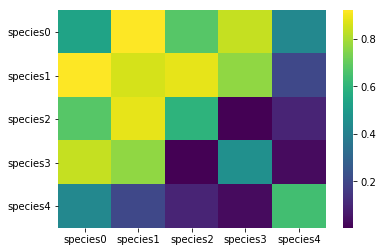

In [1]:
# 1.4 Pandas, Dataframes, нет, панды тут ни при чем
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dft = pd.read_csv(r'C:\Users\gy\Downloads\titanic.csv')

d_gen = pd.read_csv(r'D:\1\stepic_lesson\genome_matrix.csv',  index_col = 0)
concentrations = pd.read_csv(r'C:\Users\gy\Downloads\algae.csv')
sns.heatmap(d_gen, cmap='viridis')

In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
dfs = pd.read_csv(r'C:\Users\gy\Downloads\StudentsPerformance.csv')

In [13]:
len(dfs[dfs['lunch'] == 'free/reduced'])/len(dfs)

0.355

In [22]:
(dfs.lunch == 'free/reduced').mean()

0.355

In [23]:
dfs.lunch.value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [26]:
dfs[dfs.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [27]:
dfs[dfs.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [28]:
dfs.groupby('lunch').agg(['mean', 'var'])

math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

In [29]:
pd.pivot_table(dfs, index='lunch', values=['math score', 'reading score', 'writing score'], aggfunc=['mean', 'var'])

mean                                     var                \
             math score reading score writing score  math score reading score   
lunch                                                                           
free/reduced  58.921127     64.653521     63.022535  229.824270    221.871139   
standard      70.034109     71.654264     70.823256  186.418089    191.285560   

                            
             writing score  
lunch                       
free/reduced    238.202881  
standard        205.620887

In [30]:
dfl = pd.read_csv(r'C:\Users\gy\Downloads\dota_hero_stats.csv')

In [31]:
dfl.dtypes

Unnamed: 0         int64
attack_type       object
id                 int64
legs               int64
localized_name    object
name              object
primary_attr      object
roles             object
dtype: object

In [33]:
dfl.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [34]:
dfa = pd.read_csv(r'C:\Users\gy\Downloads\accountancy.csv')
dfa.head(10)

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184
5,5,Loopa,F,232
6,6,Loopa,B,249
7,7,Pupa,F,195
8,8,Pupa,A,115
9,9,Pupa,E,65


In [41]:
dfa.groupby(['Type', 'Executor']).aggregate({'Salary':'mean'}).sort_values(['Type', 'Salary'], ascending = [True, False]).groupby('Type').head(1)

,,Salary
Type,Executor,
A,Pupa,160.833333
B,Loopa,145.166667
C,Loopa,154.333333
D,Pupa,146.500000
E,Loopa,164.000000
F,Loopa,238.000000


In [36]:
dfa.pivot_table(values = "Salary", index = "Executor", columns = "Type")

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


In [48]:
dfl.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [50]:
dfl.groupby(['attack_type', 'primary_attr'], as_index=False).aggregate({'id':'count'}).sort_values('id', ascending=False)

,attack_type,primary_attr,id
4,Ranged,int,40
2,Melee,str,35
0,Melee,agi,19
3,Ranged,agi,18
5,Ranged,str,3
1,Melee,int,2


In [54]:
concentrations = pd.read_csv(r'C:\Users\gy\Downloads\algae.csv')

In [23]:
concentrations.groupby('genus', as_index=False).mean()

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
1,Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
2,Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
3,Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [4]:
d_gen.head(10)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [3]:
df=pd.read_csv(r'D:\1\stepic_lesson\income.csv')

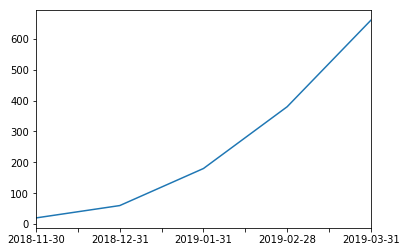

In [4]:
df.income.plot()

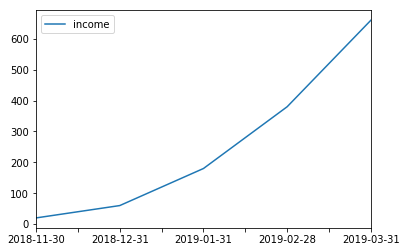

In [7]:
df.plot()

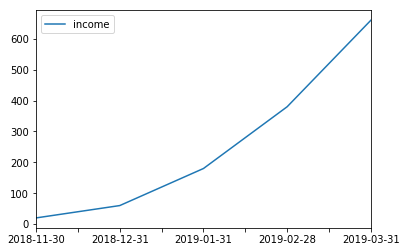

In [8]:
df.plot(kind='line')

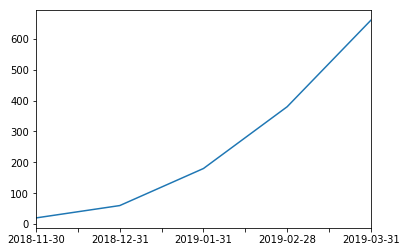

In [9]:
df['income'].plot()

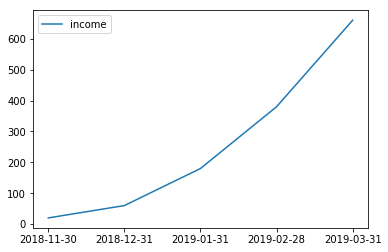

In [5]:
sns.lineplot(data=df)

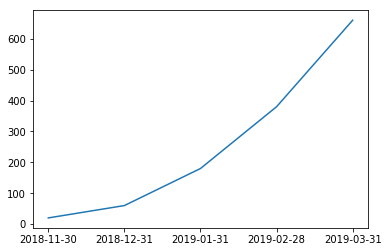

In [6]:
plt.plot(df.index, df.income)

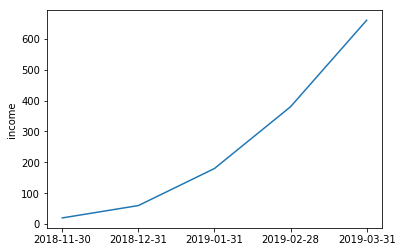

In [7]:
sns.lineplot(x=df.index, y=df.income)

In [28]:
dat_dota=pd.read_csv(r'D:\1\stepic_lesson\dota_hero_stats.csv')
dat_dota['count_roles'] = dat_dota['roles'].apply(lambda x: len(eval(x)))
dat_dota.groupby('count_roles').size()

count_roles
1     1
2     9
3    28
4    38
5    33
6     8
dtype: int64

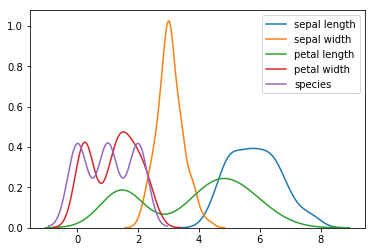

In [35]:
dat_iris=pd.read_csv(r'D:\1\stepic_lesson\iris.csv', index_col = 0)
for column in dat_iris:
    sns.kdeplot(dat_iris[column])


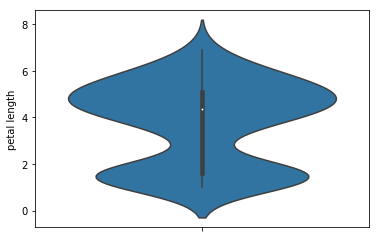

In [7]:
sns.violinplot(dat_iris['petal length'], orient='v')

In [4]:
data= {'type':['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]}
df=pd.DataFrame(data)
df

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [3]:
my_stat = pd.read_csv(r'D:\1\stepic_lesson\my_stat.csv')
my_stat.head(10)

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
9,-1,10.0,A,0.0


In [8]:
subset_1=my_stat.iloc[:10, [0,2]]
subset_2=my_stat[~my_stat.index.isin([0,4])].iloc[:, [1,3] ]


,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [14]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] =='A')]
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
10,1,10.0,A,1.0
11,-2,10.0,A,1.0


In [16]:
import numpy as np

my_stat['V5'] = my_stat['V1'] + my_stat['V4'] 
my_stat['V6'] = np.log(my_stat['V2'])
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
5,2,11.0,A,0.0,2.0,2.397895
6,0,9.0,A,2.0,2.0,2.197225
7,1,9.0,A,1.0,2.0,2.197225
8,0,9.0,B,2.0,2.0,2.197225
9,-1,10.0,A,0.0,-1.0,2.302585


In [19]:
my_stat.columns=['session_value','group', 'time', 'n_users']
my_stat

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
9,-1,10.0,A,0.0


In [20]:
concentrations.head(15)

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [21]:
concentrations[concentrations.genus== 'Fucus'].alanin.describe()

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [24]:
a=concentrations[concentrations.genus== 'Fucus'].alanin.describe()
print('{:.2f} {:.2f} {:.2f}'.format(a['min'], a['mean'], a['max']))

0.35 3.57 6.64


In [29]:
concentrations.groupby('group').citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

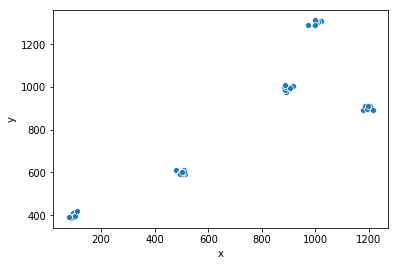

In [34]:
d_klast=pd.read_csv('d:\\1\\stepic_lesson\\dataset_209770_6.txt', sep=' ')
#d_klast.head(10)
sns.scatterplot(x='x', y='y', data=d_klast)

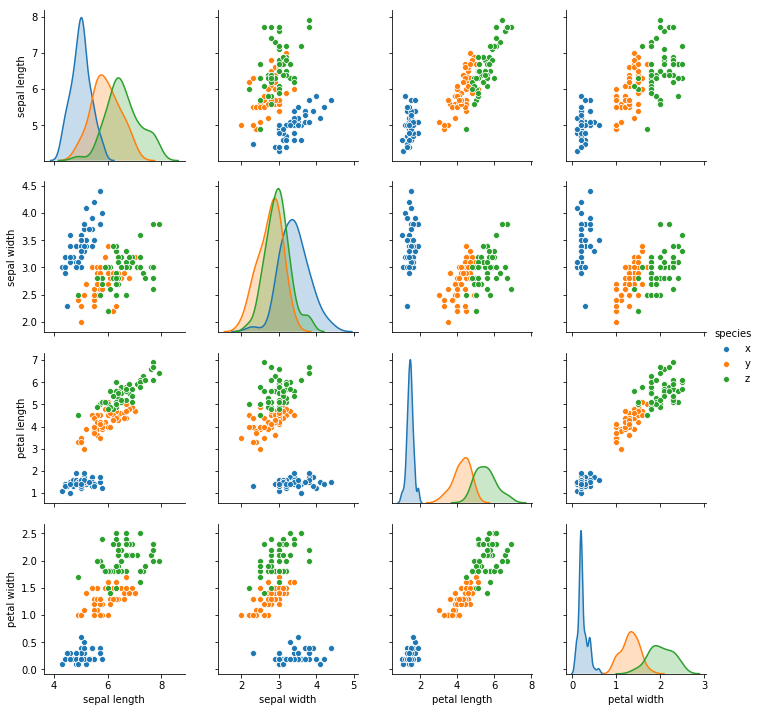

In [2]:
dat_iris=pd.read_csv(r'D:\1\stepic_lesson\iris.csv', index_col = 0)
dat_iris.species = dat_iris.species.map({0: 'x', 1: 'y', 2: 'z'})
sns.pairplot(data=dat_iris, hue="species")

In [37]:
dat_iris.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
my_stat = pd.read_csv(r'D:\1\stepic_lesson\my_stat_1.csv')
my_stat.head(10)

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [24]:
my_stat['session_value'].fillna(0, inplace = True)

my_stat.loc[my_stat['n_users']<0, 'n_users'] = my_stat[my_stat['n_users']>=0]['n_users'].median()
my_stat.head(20)


,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [28]:
mean_session_value_data = my_stat.groupby('group').agg({ 'session_value' : 'mean'}).reset_index()
mean_session_value_data.rename(columns= {'session_value' : 'mean_session_value'}, inplace=True)
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0


In [29]:
events_data = pd.read_csv(r'd:/1/stepic_lesson/event_data_train.csv')
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [39]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data['date'].dt.date
events_data.head(10)
gr_user = events_data.groupby('user_id').day.nunique()
gr_user.sort_values(ascending=False)

user_id
1046     478
13268    385
4374     327
10794    281
3572     236
20907    221
2054     184
23342    179
39       170
1078     164
10616    158
2534     141
26291    129
6976     127
9107     127
17301    126
23762    123
11026    120
12635    118
11651    117
2048     113
11950    112
25328    110
25632    109
18404    108
9546     108
18000    106
24745    104
12213    103
19059    102
        ... 
14814      1
14813      1
14812      1
14809      1
14864      1
14866      1
14944      1
14867      1
14929      1
14924      1
14922      1
14921      1
14916      1
14914      1
14910      1
14909      1
14908      1
14907      1
14900      1
14899      1
14897      1
14894      1
14890      1
14889      1
14884      1
14880      1
14878      1
14875      1
14873      1
1          1
Name: day, Length: 19234, dtype: int64

In [31]:
d_cats = pd.read_csv('d://1/stepic_lesson/cats.csv',index_col=0)
d_cats.head(10)

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [82]:
entr = pd.DataFrame(d_cats['Гавкает'].value_counts(ascending=True))
entr.columns = ['value']
entr['entr'] = - (entr.value/entr.value.sum()) * (np.log2(entr.value/entr.value.sum()))
#entr.index.sort_values(ascending=False)
entr

,value,entr
0,5,0.5
1,5,0.5


In [78]:
d_entr = d_cats.groupby(['Лазает по деревьям', 'Вид']).agg({'Вид' : 'count'}).rename(columns= {'Вид' : 'value'}).reset_index(level =1)
print(d_entr.head())
entr = d_entr.loc[0]
entr['entr'] = - (entr.value/entr.value.sum()) * (np.log2(entr.value/entr.value.sum()))
#entr.index.sort_values(ascending=False)
#pd.DataFrame(entr[['value', 'entr']].sum())

entr

                        Вид  value
Лазает по деревьям                
0                   собачка      4
1                     котик      6


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


Вид      собачка
value          4
entr          -0
Name: 0, dtype: object

In [88]:
import pandas as pd
from scipy.stats import entropy


def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('d://1/stepic_lesson/cats.csv', index_col=0)
print('Начальная ентропия: ', ent(df))
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

print("IG Шерстист",  ent(df) - 9/10*ent(df[df.Шерстист == 1]))
print("IG Гавкает",  ent(df) - 5/10*ent(df[df.Гавкает == 1]))


Начальная ентропия:  0.9709505944546688
Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0
IG Шерстист 0.07898214060026876
IG Гавкает 0.6099865470109876


In [40]:
%matplotlib inline
import pandas as pd

submissions_data = pd.read_csv(r'd:/1/stepic_lesson/submissions_data_train.csv')

submissions_data['dat']=pd.to_datetime(submissions_data.timestamp, unit= 's')
submissions_data['day']=submissions_data['dat'].dt.date
print(submissions_data.head())
print(submissions_data.shape)

   step_id   timestamp submission_status  user_id                 dat  \
0    31971  1434349275           correct    15853 2015-06-15 06:21:15   
1    31972  1434348300           correct    15853 2015-06-15 06:05:00   
2    31972  1478852149             wrong    15853 2016-11-11 08:15:49   
3    31972  1478852164           correct    15853 2016-11-11 08:16:04   
4    31976  1434348123             wrong    15853 2015-06-15 06:02:03   

          day  
0  2015-06-15  
1  2015-06-15  
2  2016-11-11  
3  2016-11-11  
4  2015-06-15  
(509104, 6)


In [10]:
submissions_data[(submissions_data.submission_status == 'wrong')].groupby('step_id', as_index=False)\
        .agg({'timestamp': 'count'}).sort_values( by = 'timestamp', ascending = False ).head()

,step_id,timestamp
4,31978,16084
11,32031,13373
19,32202,13002
44,33481,10300
12,32075,10003


In [44]:
wrong_step_user=submissions_data[(submissions_data.submission_status == 'wrong')& (submissions_data.timestamp == submissions_data.last_timestamp)]\
            .groupby(['step_id', 'user_id'], as_index=False)\
            .count().sort_values( by = 'timestamp', ascending = False )
wrong_step_user.groupby('step_id', as_index=False).agg({'user_id': 'count'}).sort_values( by = 'user_id', ascending = False ).head()

,step_id,user_id
4,31978,154
28,32812,133
11,32031,97
19,32202,92
42,33481,78


In [41]:
last_day_dat = submissions_data.groupby('user_id',  as_index=False).agg({'day': 'max'}).rename(columns={'day':'last_day'})
last_day_dat.shape
last_timestamp_dat = submissions_data.groupby('user_id',  as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp':'last_timestamp'})

In [42]:
submissions_data=submissions_data.merge(last_day_dat , on='user_id', how='outer')
submissions_data=submissions_data.merge(last_timestamp_dat , on='user_id', how='outer')
submissions_data.head()

,step_id,timestamp,submission_status,user_id,dat,day,last_day,last_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,2016-11-21,1479734163
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,2016-11-21,1479734163
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,2016-11-21,1479734163
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,2016-11-21,1479734163
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,2016-11-21,1479734163


In [43]:
submissions_data[(submissions_data.submission_status == 'wrong') & (submissions_data.timestamp == submissions_data.last_timestamp)]\
        .groupby('step_id', as_index=False)\
        .agg({'timestamp': 'count'}).sort_values( by = 'timestamp', ascending = False ).head()

,step_id,timestamp
4,31978,154
28,32812,133
11,32031,97
19,32202,92
42,33481,78


In [17]:
%%timeit
dat_iris.describe().loc['mean']

13.5 ms ± 708 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
dat_iris.mean(axis=0)

160 µs ± 6.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit
dat_iris.apply('mean')

622 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
dat_iris.apply(np.mean)

1.09 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit
dat_iris.apply('mean')

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [13]:
dat_iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
dat_iris=pd.read_csv(r'D:\1\stepic_lesson\iris.csv', index_col = 0)

In [5]:
# 3.7 Бонусный урок - трюки в Pandas Exercise 2 
import pandas as pd
wintering = pd.Series([1,2,4,8,3,6,2,1])
total_birds = wintering.expanding().sum()
total_birds

0     1.0
1     3.0
2     7.0
3    15.0
4    18.0
5    24.0
6    26.0
7    27.0
dtype: float64